### 회귀 분석을 위한 랜덤 포레스트 모델
- 모델을 훈련한 후, 훈련된 랜덤 포레스트 모델의 feature_importances_ 속성을 사용하여 특성 중요도를 추출

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# Import libraries to rain the model and test it
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [30]:
df = pd.read_csv("/home/kkyu/amr_ws/DL/IoT_Project/environment.csv")
df.head()

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3)
0,2024-03-10 13:01:38,26.2,23.0,294,11.36
1,2024-03-10 13:01:40,26.2,23.0,293,20.16
2,2024-03-10 13:01:42,26.2,23.0,290,23.09
3,2024-03-10 13:01:44,26.2,23.0,288,22.11
4,2024-03-10 13:01:48,26.2,23.0,285,26.02


In [31]:
# 'AQI' 컬럼 생성
df['AQI'] = 0

# for loop를 사용하여 각 행에 대한 AQI 값 계산 및 할당
for index, row in df.iterrows():
    PM_10_value = row['PM-10 (μg/m3)']
    AQI_value = ((100 - 51) / (80 - 31)) * (PM_10_value - 31) + 51
    df.at[index, 'AQI'] = AQI_value

df.head()

/tmp/ipykernel_35373/3340056854.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '31.36' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'AQI'] = AQI_value


,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),AQI
0,2024-03-10 13:01:38,26.2,23.0,294,11.36,31.36
1,2024-03-10 13:01:40,26.2,23.0,293,20.16,40.16
2,2024-03-10 13:01:42,26.2,23.0,290,23.09,43.09
3,2024-03-10 13:01:44,26.2,23.0,288,22.11,42.11
4,2024-03-10 13:01:48,26.2,23.0,285,26.02,46.02


In [32]:
# 'AQI_Bucket' 컬럼 생성 및 값 할당
df['AQI_Bucket'] = pd.cut(df['AQI'], bins=[0, 50, 100, 250, 500], labels=['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy'])

df.head()

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),AQI,AQI_Bucket
0,2024-03-10 13:01:38,26.2,23.0,294,11.36,31.36,Good
1,2024-03-10 13:01:40,26.2,23.0,293,20.16,40.16,Good
2,2024-03-10 13:01:42,26.2,23.0,290,23.09,43.09,Good
3,2024-03-10 13:01:44,26.2,23.0,288,22.11,42.11,Good
4,2024-03-10 13:01:48,26.2,23.0,285,26.02,46.02,Good


In [33]:
X = df.drop(['AQI', 'AQI_Bucket', 'Date'], axis=1)
y = df['AQI']


In [34]:
def solve(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1)
    # using linear regression
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("R2_score of Linear Regression:",r2_score(y_test,y_pred))

    model = Lasso(alpha=0.1)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("R2_score of Lasso Regression:",r2_score(y_test,y_pred))

    model = Ridge(alpha=0.1)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("R2_score of Ridge Regression:",r2_score(y_test,y_pred))

    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R2_score of Random Forest Regression:",r2_score(y_test,y_pred))


In [35]:
solve(X,y)

R2_score of Linear Regression: 1.0
R2_score of Lasso Regression: 0.9999999997202119
R2_score of Ridge Regression: 0.9999999999999998
R2_score of Random Forest Regression: 0.994956652447597


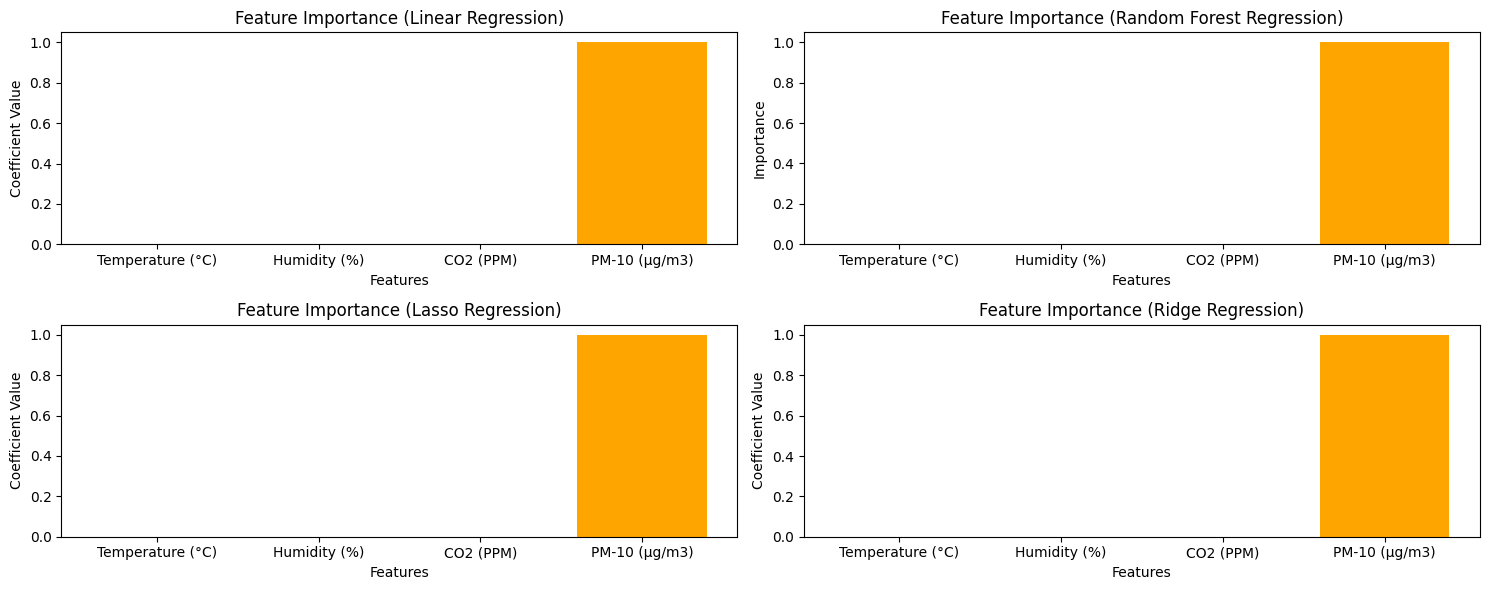

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

# 랜덤포레스트 회귀 모델
random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)
y_pred_random = random_model.predict(X_test)

# 선형 회귀 모델
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Lasso 회귀 모델
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Ridge 회귀 모델
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


color = ['red','blue','green', 'orange']
fig, axes = plt.subplots(2, 2, figsize=(15, 6))

# 선형 회귀 모델의 특성 중요도 그래프
axes[0, 0].bar(np.arange(len(linear_model.coef_)), linear_model.coef_, color=color)
axes[0, 0].set_xticks(np.arange(len(linear_model.coef_)))
axes[0, 0].set_xticklabels(X.columns)
axes[0, 0].set_xlabel('Features')
axes[0, 0].set_ylabel('Coefficient Value')
axes[0, 0].set_title('Feature Importance (Linear Regression)')

# 랜덤 포레스트 회귀 모델의 특성 중요도 그래프
axes[0, 1].bar(np.arange(len(random_model.feature_importances_)), random_model.feature_importances_, color=color)
axes[0, 1].set_xticks(np.arange(len(random_model.feature_importances_)))
axes[0, 1].set_xticklabels(X.columns)
axes[0, 1].set_xlabel('Features')
axes[0, 1].set_ylabel('Importance')
axes[0, 1].set_title('Feature Importance (Random Forest Regression)')

# Lasso 회귀 모델의 특성 중요도 그래프
axes[1, 0].bar(np.arange(len(lasso_model.coef_)), lasso_model.coef_, color=color)
axes[1, 0].set_xticks(np.arange(len(lasso_model.coef_)))
axes[1, 0].set_xticklabels(X.columns)
axes[1, 0].set_xlabel('Features')
axes[1, 0].set_ylabel('Coefficient Value')
axes[1, 0].set_title('Feature Importance (Lasso Regression)')

# Ridge 회귀 모델의 특성 중요도 그래프
axes[1, 1].bar(np.arange(len(ridge_model.coef_)), ridge_model.coef_, color=color)
axes[1, 1].set_xticks(np.arange(len(ridge_model.coef_)))
axes[1, 1].set_xticklabels(X.columns)
axes[1, 1].set_xlabel('Features')
axes[1, 1].set_ylabel('Coefficient Value')
axes[1, 1].set_title('Feature Importance (Ridge Regression)')


plt.tight_layout()
plt.show()


### Model Training

In [38]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [42]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
}

model_list = []
r2_list =[]

for model_name, model in models.items():
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.0126
- Mean Absolute Error: 0.0037
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0123
- Mean Absolute Error: 0.0035
- R2 Score: 1.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2.3554
- Mean Absolute Error: 0.6678
- R2 Score: 0.9991
-----------------------

In [43]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,1.000000
1,Lasso,1.000000
5,XGBRegressor,0.996138
6,CatBoosting Regressor,0.994961
4,Random Forest Regressor,0.991933
3,K-Neighbors Regressor,0.988724
